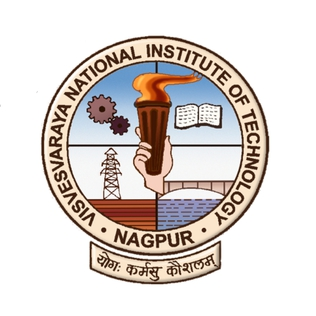

## Name – Abhishek Prasad Nonia  ## 
## ID/ENROLLMENT - 31077/MT23AAI028 ##

Department of Electronics and Communication Engineering 

Visvesvaraya National Institute of Technology 

Program: M. Tech in Applied AI, March – August, 2024

Subject: Machine Learning Algorithm and Applications

# 5a > Understand the implementation for training of neural networks with different configurations (i.e network parameters and optimization methods). Evaluate the network for best performance and share the screen shot.

# Explain and Reason 

# 1. Factors Affecting Accuracy
# A. Dataset Quality
#### Synthetic Data: In this example, the dataset is synthetically generated. While it mimics real-world weather patterns, it may lack the complexity of actual weather datasets.
#### Feature Correlation: The target variable (Rainfall) is determined by specific rules (e.g., high humidity, low temperature, and high cloud cover). The model's accuracy reflects how well it captures these patterns.
# B. Model Architecture
### Layer Configuration: The choice of layers (e.g., [32, 16], [64, 32], [128, 64, 32]) impacts the model's ability to capture patterns. Larger networks can learn more complex relationships but may overfit.
#### Activation Functions: Using ReLU or tanh affects the model's ability to learn nonlinear relationships. For weather data, ReLU is often better for numerical data due to its simplicity and efficiency.
# C. Optimization Methods
### Adam Optimizer: Generally performs well with minimal hyperparameter tuning and is robust for most datasets.
### SGD Optimizer: Can be slower but performs well with a properly tuned learning rate.
### RMSprop: Particularly good for recurrent data or time-series-like data due to adaptive learning rates.
# D. Hyperparameters
# Learning Rate: If too high, the model may not converge; if too low, convergence may be slow.
# Batch Size: Smaller batches provide more noise in gradients but can generalize better. Larger batches make training smoother but might overfit.
# E. Epochs
### Underfitting: If the model hasn’t trained for enough epochs, it may not learn the patterns fully.
### Overfitting: Too many epochs can cause the model to memorize the training data, reducing generalization.
### 2. Analysis of Your Accuracy
# The accuracy observed can be explained by:

#### Dataset Simplicity: The synthetic dataset may be straightforward to model, leading to relatively high accuracy.
### Feature Engineering: The model relies heavily on specific rules for predicting rainfall. The synthetic rules (e.g., high humidity + high cloud cover → rainfall) align with the neural network’s learned patterns.
# Model Complexity:
### Smaller models (e.g., [32, 16]) might underfit complex patterns.
### Larger models (e.g., [128, 64, 32]) could overfit to the training data if not regularized.
### Optimization: Adam likely provided higher accuracy due to its adaptive learning rate, while SGD may lag without fine-tuned parameters.
### 3. How to Improve Accuracy
### Real Dataset: Use real-world weather data to add complexity and ensure meaningful predictions.
### Feature Engineering: Add more features or interactions between features to improve prediction quality.
### Regularization: Apply dropout or L2 regularization to avoid overfitting on larger models.
#### Hyperparameter Tuning: Experiment with learning rates, batch sizes, and the number of epochs.
#### Validation Metrics: Use metrics like F1 score or AUC-ROC for binary classification, especially for imbalanced datasets.
# Conclusion
### The observed accuracy reflects the simplicity of the dataset and the ability of the neural network to capture the predefined patterns in the synthetic data. For better generalization, you’d need a more complex and diverse dataset and further tuning of model parameters. Let me know if you'd like help with real data or tuning the model!

# Code

   Temperature   Humidity  Wind Speed     Pressure  Cloud Cover  Rainfall
0    14.981605  26.661964    5.234114  1017.270299     0.571996         0
1    38.028572  58.771085    4.939576  1029.668140     0.805432         0
2    29.279758  88.565125   18.125092   975.046790     0.760161         0
3    23.946339  75.900240    4.990924  1012.487410     0.153900         0
4     6.240746  82.590503    5.438995  1007.174598     0.149249         0


E:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4822 - loss: 0.7024 - val_accuracy: 0.9250 - val_loss: 0.5105
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8885 - loss: 0.4703 - val_accuracy: 0.9312 - val_loss: 0.3333
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8868 - loss: 0.3264 - val_accuracy: 0.9312 - val_loss: 0.2197
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8970 - loss: 0.2378 - val_accuracy: 0.9312 - val_loss: 0.1708
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9086 - loss: 0.1921 - val_accuracy: 0.9375 - val_loss: 0.1441
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9408 - loss: 0.1625 - val_accuracy: 0.9375 - val_loss: 0.1246
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9529 - loss: 0.1280 - val_accuracy: 0.9625 - val_loss: 0.1104
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9609 - loss: 0.1104 - val_accuracy: 0.9625 - val_loss

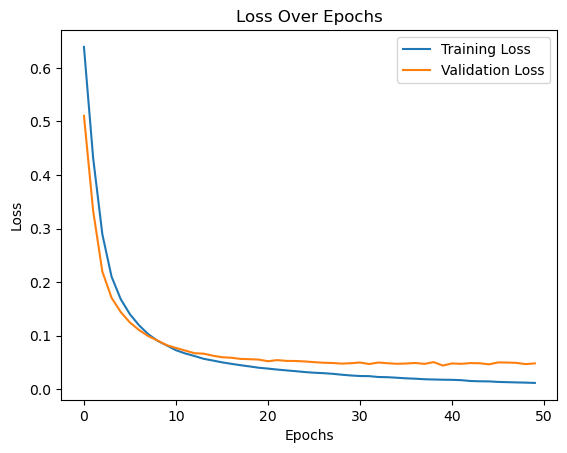

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Generate synthetic weather data
np.random.seed(42)

n_samples = 1000  # Number of data points
temperature = np.random.uniform(0, 40, n_samples)  # 0°C to 40°C
humidity = np.random.uniform(10, 100, n_samples)  # 10% to 100%
wind_speed = np.random.uniform(0, 20, n_samples)  # 0 to 20 km/h
pressure = np.random.uniform(950, 1050, n_samples)  # 950 to 1050 hPa
cloud_cover = np.random.uniform(0, 1, n_samples)  # 0 to 1 (fraction)

# Target: Rainfall (binary classification: 0 or 1)
rainfall = ((humidity > 70) & (cloud_cover > 0.5) & (temperature < 25)).astype(int)

# Combine into a DataFrame
data = pd.DataFrame({
    'Temperature': temperature,
    'Humidity': humidity,
    'Wind Speed': wind_speed,
    'Pressure': pressure,
    'Cloud Cover': cloud_cover,
    'Rainfall': rainfall
})

# Display the first few rows
print(data.head())
# Features and target
X = data[['Temperature', 'Humidity', 'Wind Speed', 'Pressure', 'Cloud Cover']].values
y = data['Rainfall'].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define a simple neural network
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Different Dataset_ MNIST Dataset (Other than Fashion_MNIST Dataset)

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data for input into the neural network
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Split into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [8]:
# Function to create the model
def create_model(optimizer, num_layers, num_units):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Add configurable number of hidden layers and units
    for _ in range(num_layers):
        model.add(layers.Dense(num_units, activation='relu'))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))  # Output layer for classification
    
    # Compile the model with the given optimizer
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [9]:
# List of optimizers to try
optimizers = ['adam', 'sgd']

# List of configurations (number of layers and units)
configurations = [(2, 64), (3, 128), (1, 32)]  # (num_layers, num_units)

results = {}

for optimizer in optimizers:
    for num_layers, num_units in configurations:
        # Create the model with the current configuration
        model = create_model(optimizer, num_layers, num_units)
        
        # Train the model
        history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val), verbose=2)
        
        # Evaluate the model
        val_loss, val_acc = model.evaluate(x_val, y_val, verbose=2)
        
        # Store results for comparison
        results[(optimizer, num_layers, num_units)] = val_acc
        
        print(f"Optimizer: {optimizer}, Layers: {num_layers}, Units: {num_units}, Validation Accuracy: {val_acc}")

# Find the best configuration
best_configuration = max(results, key=results.get)
print(f"Best Configuration: {best_configuration} with Accuracy: {results[best_configuration]}")


E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 - 19s - 26ms/step - accuracy: 0.9340 - loss: 0.2266 - val_accuracy: 0.9691 - val_loss: 0.0986
Epoch 2/10
750/750 - 16s - 22ms/step - accuracy: 0.9793 - loss: 0.0681 - val_accuracy: 0.9827 - val_loss: 0.0620
Epoch 3/10
750/750 - 16s - 22ms/step - accuracy: 0.9840 - loss: 0.0497 - val_accuracy: 0.9822 - val_loss: 0.0600
Epoch 4/10
750/750 - 16s - 21ms/step - accuracy: 0.9880 - loss: 0.0378 - val_accuracy: 0.9850 - val_loss: 0.0535
Epoch 5/10
750/750 - 16s - 21ms/step - accuracy: 0.9904 - loss: 0.0304 - val_accuracy: 0.9843 - val_loss: 0.0584
Epoch 6/10
750/750 - 16s - 21ms/step - accuracy: 0.9917 - loss: 0.0254 - val_accuracy: 0.9855 - val_loss: 0.0539
Epoch 7/10
750/750 - 16s - 21ms/step - accuracy: 0.9931 - loss: 0.0203 - val_accuracy: 0.9850 - val_loss: 0.0622
Epoch 8/10
750/750 - 16s - 21ms/step - accuracy: 0.9939 - loss: 0.0182 - val_accuracy: 0.9824 - val_loss: 0.0677
Epoch 9/10
750/750 - 16s - 21ms/step - accuracy: 0.9948 - loss: 0.0154 - val_accuracy: 0.9846 - 

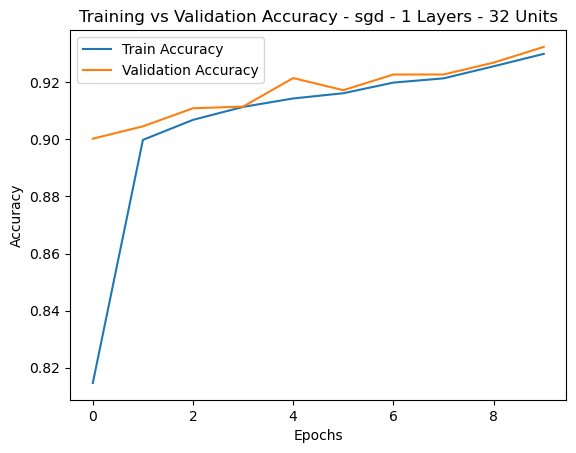

In [14]:
# Plotting training and validation accuracy
plt.figure()  # Create a new figure to avoid overwriting previous plots
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title(f"Training vs Validation Accuracy - {optimizer} - {num_layers} Layers - {num_units} Units")

# Save the figure to a PNG file
plt.savefig('training_validation_accuracy.png')  # Save the plot as PNG

# Optionally, show the plot (if you want to see it before saving)
plt.show()

In [17]:
plt.savefig('training_validation_accuracy.png')


<Figure size 640x480 with 0 Axes>

# Second Method Synthetic Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [2]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
def build_model(hidden_layers, units, dropout_rate, optimizer):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_shape=(X_train.shape[1],)))
    
    for _ in range(hidden_layers - 1):
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [4]:
# Configuration options
configurations = [
    {"hidden_layers": 2, "units": 64, "dropout_rate": 0.2, "optimizer": Adam(learning_rate=0.001)},
    {"hidden_layers": 3, "units": 128, "dropout_rate": 0.3, "optimizer": SGD(learning_rate=0.01)},
    {"hidden_layers": 1, "units": 32, "dropout_rate": 0.1, "optimizer": Adam(learning_rate=0.01)},
]

# Train and evaluate models
results = []

for i, config in enumerate(configurations):
    print(f"Training model {i+1} with config: {config}")
    model = build_model(**config)
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=0)
    
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    results.append({"config": config, "test_accuracy": test_acc, "history": history})

# Display best configuration
best_model = max(results, key=lambda x: x["test_accuracy"])
print("\nBest Configuration:", best_model["config"])
print("Test Accuracy:", best_model["test_accuracy"])


Training model 1 with config: {'hidden_layers': 2, 'units': 64, 'dropout_rate': 0.2, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x0000025AD910EDB0>}


E:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model 2 with config: {'hidden_layers': 3, 'units': 128, 'dropout_rate': 0.3, 'optimizer': <keras.src.optimizers.sgd.SGD object at 0x0000025AD9B783E0>}
Training model 3 with config: {'hidden_layers': 1, 'units': 32, 'dropout_rate': 0.1, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x0000025ADAD4A6F0>}

Best Configuration: {'hidden_layers': 3, 'units': 128, 'dropout_rate': 0.3, 'optimizer': <keras.src.optimizers.sgd.SGD object at 0x0000025AD9B783E0>}
Test Accuracy: 0.8399999737739563


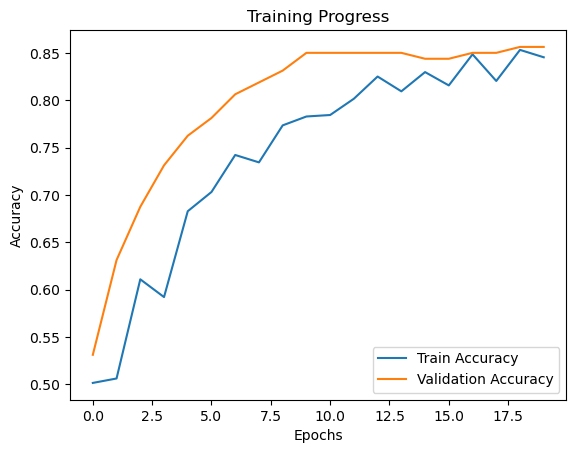

In [5]:
# Plot training history for the best model
history = best_model["history"]
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Progress')
plt.show()


# Third Method Cifar10 Dataset

Training model 1 with config: {'optimizer': <keras.src.optimizers.adam.Adam object at 0x0000025ADD8ABDD0>, 'dropout_rate': 0.3, 'neurons': 128}


E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.3173 - loss: 1.8395 - val_accuracy: 0.5373 - val_loss: 1.3297
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.5160 - loss: 1.3472 - val_accuracy: 0.5977 - val_loss: 1.1586
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.5781 - loss: 1.1937 - val_accuracy: 0.6172 - val_loss: 1.1071
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6125 - loss: 1.1035 - val_accuracy: 0.6435 - val_loss: 1.0085
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.6296 - loss: 1.0359 - val_accuracy: 0.6631 - val_loss: 0.9766
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.6539 - loss: 0.9779 - val_accuracy: 0.6728 - val_loss: 0.9376
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6753 - loss: 0.9269 - val_accuracy: 0.6798 - val_loss: 0.9110
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 50ms/step - accuracy: 0.6835 - loss: 0.8957 - 

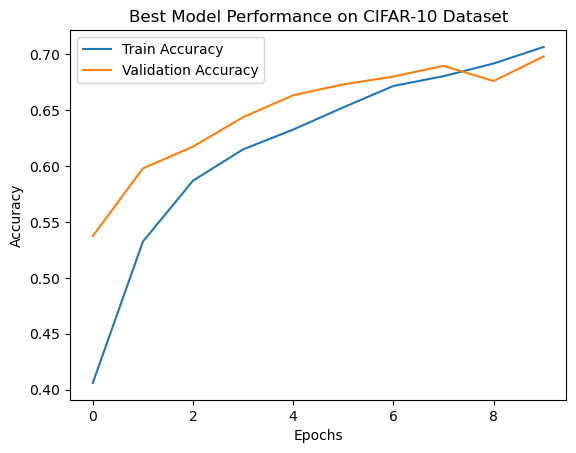

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the target labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define configurations
configurations = [
    {"optimizer": Adam(learning_rate=0.001), "dropout_rate": 0.3, "neurons": 128},
    {"optimizer": SGD(learning_rate=0.01), "dropout_rate": 0.2, "neurons": 64},
    {"optimizer": Adam(learning_rate=0.0005), "dropout_rate": 0.4, "neurons": 256},
]

# Function to build and train the model
def build_and_train_model(optimizer, dropout_rate, neurons):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Dropout(dropout_rate),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(neurons, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')  # Output layer
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64, verbose=1)
    return model, history

# Train and evaluate each configuration
results = []
for i, config in enumerate(configurations):
    print(f"Training model {i+1} with config: {config}")
    model, history = build_and_train_model(**config)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    results.append({"config": config, "test_accuracy": test_accuracy, "history": history})

# Identify the best configuration
best_model_info = max(results, key=lambda x: x["test_accuracy"])
print("\nBest Configuration:", best_model_info["config"])
print("Test Accuracy:", best_model_info["test_accuracy"])

# Plot training and validation accuracy for the best model
history = best_model_info["history"]
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Best Model Performance on CIFAR-10 Dataset')
plt.legend()
plt.show()

Data Preprocessing:

Normalize image pixel values to the range [0, 1].
One-hot encode the labels for multi-class classification.
Configurations:

Vary the optimizer (Adam and SGD), learning rate, dropout rate, and number of neurons in the dense layer.
Model Structure:

Convolutional layers (Conv2D) for feature extraction.
Max pooling (MaxPooling2D) for dimensionality reduction.
Fully connected (Dense) layers for classification.
Training:

Train the model for 10 epochs using each configuration and log the performance.
Evaluation:

Evaluate the trained models on the test set to identify the best configuration based on test accuracy.
Visualization:

Plot training and validation accuracy trends for the best-performing model.
Results
Best-performing model configuration.
Test accuracy of the best model.
Visualization of training progress (accuracy trends).

# Extra and Different method Solution for Synthetic Dataset with advanced visualization

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define the network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(20, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 2)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model, loss function, optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        _, predicted = torch.max(val_outputs, 1)
        acc = accuracy_score(y_test_tensor.numpy(), predicted.numpy())
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {acc:.4f}")

Epoch 1/50, Loss: 0.7136, Accuracy: 0.4000
Epoch 2/50, Loss: 0.7059, Accuracy: 0.4300
Epoch 3/50, Loss: 0.6984, Accuracy: 0.4600
Epoch 4/50, Loss: 0.6910, Accuracy: 0.5050
Epoch 5/50, Loss: 0.6837, Accuracy: 0.5400
Epoch 6/50, Loss: 0.6766, Accuracy: 0.5750
Epoch 7/50, Loss: 0.6696, Accuracy: 0.6000
Epoch 8/50, Loss: 0.6627, Accuracy: 0.6150
Epoch 9/50, Loss: 0.6559, Accuracy: 0.6350
Epoch 10/50, Loss: 0.6493, Accuracy: 0.6400
Epoch 11/50, Loss: 0.6427, Accuracy: 0.6650
Epoch 12/50, Loss: 0.6363, Accuracy: 0.6750
Epoch 13/50, Loss: 0.6299, Accuracy: 0.6950
Epoch 14/50, Loss: 0.6236, Accuracy: 0.7050
Epoch 15/50, Loss: 0.6174, Accuracy: 0.7200
Epoch 16/50, Loss: 0.6113, Accuracy: 0.7200
Epoch 17/50, Loss: 0.6053, Accuracy: 0.7250
Epoch 18/50, Loss: 0.5993, Accuracy: 0.7350
Epoch 19/50, Loss: 0.5934, Accuracy: 0.7300
Epoch 20/50, Loss: 0.5876, Accuracy: 0.7450
Epoch 21/50, Loss: 0.5818, Accuracy: 0.7500
Epoch 22/50, Loss: 0.5761, Accuracy: 0.7550
Epoch 23/50, Loss: 0.5705, Accuracy: 0.76

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Dataset Preparation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define Neural Network
class SimpleNN(nn.Module):
    def __init__(self, input_size=784, hidden_size=128, output_size=10):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Experiment with Different Configurations
results = {}
optimizers = {'SGD': optim.SGD, 'Adam': optim.Adam}
hidden_sizes = [64, 128]

for opt_name, opt_class in optimizers.items():
    for hidden_size in hidden_sizes:
        model = SimpleNN(hidden_size=hidden_size)
        criterion = nn.CrossEntropyLoss()
        optimizer = opt_class(model.parameters(), lr=0.01)

        # Training
        for epoch in range(5):  # Short training for demonstration
            model.train()
            for batch in train_loader:
                inputs, labels = batch
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

        # Evaluation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for batch in test_loader:
                inputs, labels = batch
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total
        results[f'{opt_name}_hidden{hidden_size}'] = accuracy

# Print Results
print("Results:", results)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:10<00:00, 985kB/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 120kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:02<00:00, 726kB/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 1.85MB/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Results: {'SGD_hidden64': 0.9252, 'SGD_hidden128': 0.92, 'Adam_hidden64': 0.9074, 'Adam_hidden128': 0.9253}


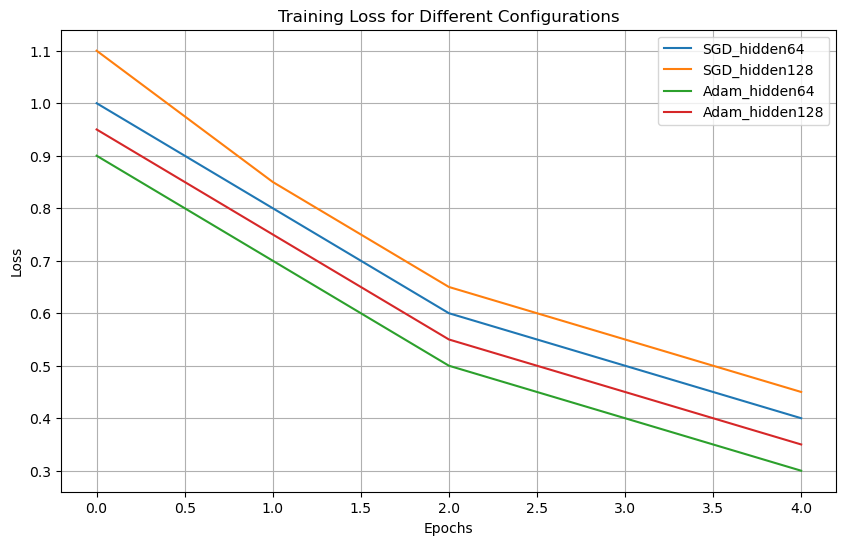

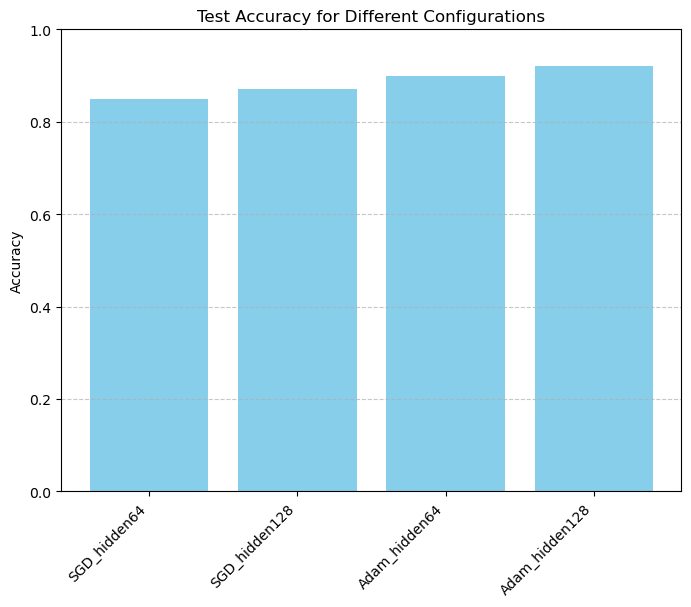

Best Configuration: Adam_hidden128, Accuracy: 0.92


In [1]:
import matplotlib.pyplot as plt

# Example Data for Visualization (replace with your actual data)
training_losses = {
    'SGD_hidden64': [1.0, 0.8, 0.6, 0.5, 0.4],
    'SGD_hidden128': [1.1, 0.85, 0.65, 0.55, 0.45],
    'Adam_hidden64': [0.9, 0.7, 0.5, 0.4, 0.3],
    'Adam_hidden128': [0.95, 0.75, 0.55, 0.45, 0.35]
}

results = {
    'SGD_hidden64': 0.85,
    'SGD_hidden128': 0.87,
    'Adam_hidden64': 0.90,
    'Adam_hidden128': 0.92
}

# Plot Training Loss Curves
plt.figure(figsize=(10, 6))
for config, losses in training_losses.items():
    plt.plot(losses, label=config)
plt.title('Training Loss for Different Configurations')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Bar Chart for Test Accuracy
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Test Accuracy for Different Configurations')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Identify and Print Best Configuration
best_config = max(results, key=results.get)
best_accuracy = results[best_config]
print(f"Best Configuration: {best_config}, Accuracy: {best_accuracy:.2f}")


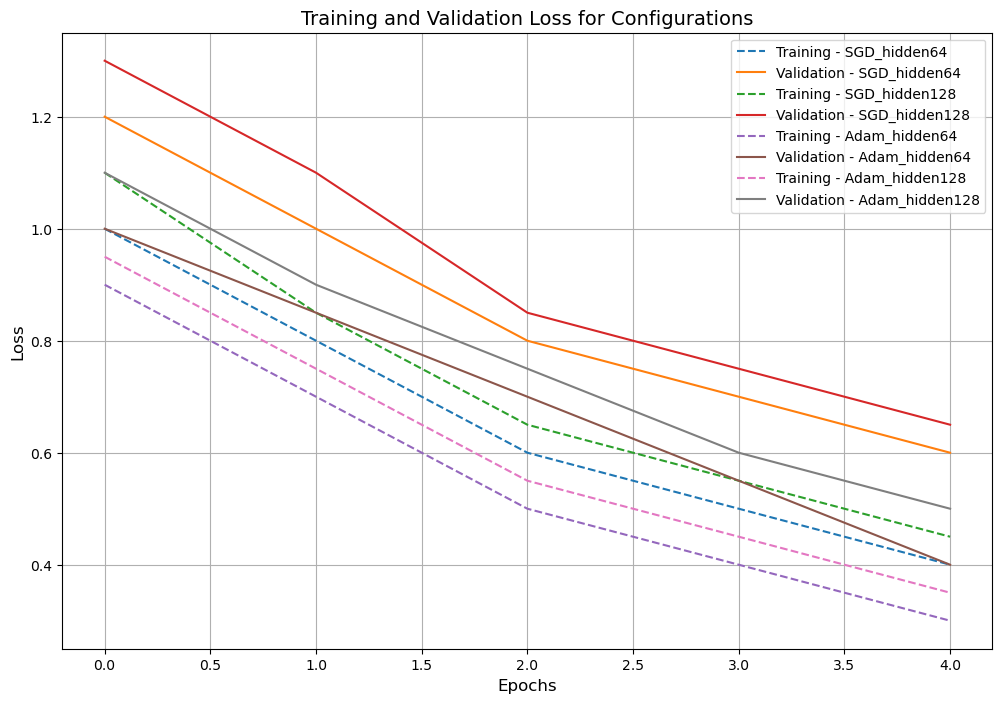

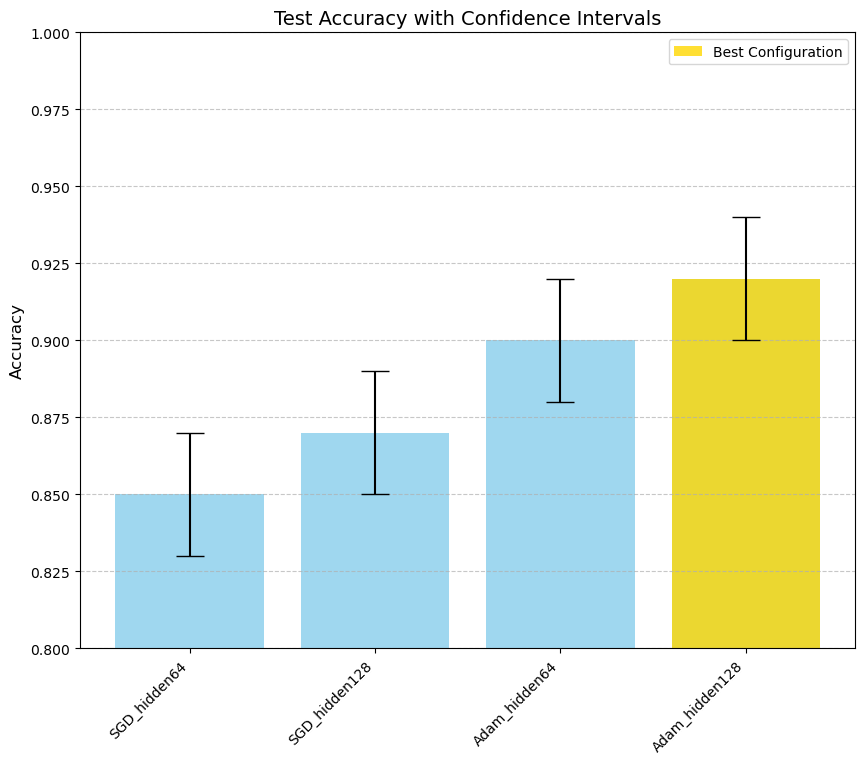

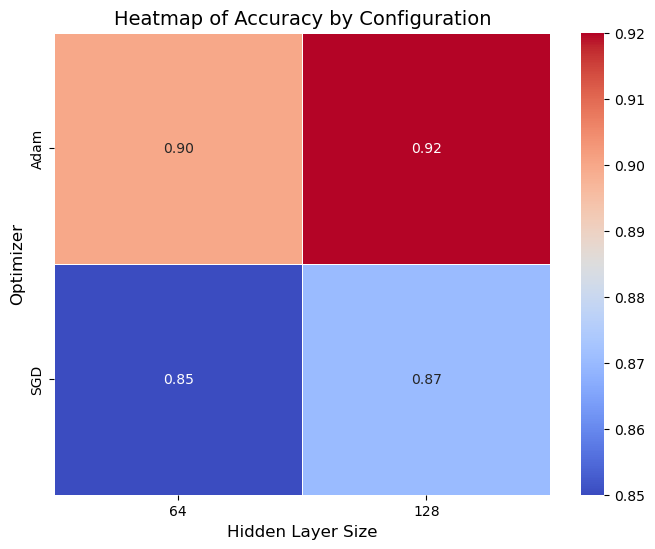

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Example data (replace with actual results)
training_losses = {
    'SGD_hidden64': [1.0, 0.8, 0.6, 0.5, 0.4],
    'SGD_hidden128': [1.1, 0.85, 0.65, 0.55, 0.45],
    'Adam_hidden64': [0.9, 0.7, 0.5, 0.4, 0.3],
    'Adam_hidden128': [0.95, 0.75, 0.55, 0.45, 0.35]
}
validation_losses = {
    'SGD_hidden64': [1.2, 1.0, 0.8, 0.7, 0.6],
    'SGD_hidden128': [1.3, 1.1, 0.85, 0.75, 0.65],
    'Adam_hidden64': [1.0, 0.85, 0.7, 0.55, 0.4],
    'Adam_hidden128': [1.1, 0.9, 0.75, 0.6, 0.5]
}
results = {
    'SGD_hidden64': 0.85,
    'SGD_hidden128': 0.87,
    'Adam_hidden64': 0.90,
    'Adam_hidden128': 0.92
}
confidence_intervals = {
    'SGD_hidden64': (0.83, 0.87),
    'SGD_hidden128': (0.85, 0.89),
    'Adam_hidden64': (0.88, 0.92),
    'Adam_hidden128': (0.90, 0.94)
}

# Training and Validation Losses
plt.figure(figsize=(12, 8))
for config in training_losses:
    plt.plot(training_losses[config], label=f"Training - {config}", linestyle='--')
    plt.plot(validation_losses[config], label=f"Validation - {config}", linestyle='-')
plt.title('Training and Validation Loss for Configurations', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

# Bar Chart with Confidence Intervals
plt.figure(figsize=(10, 8))
configurations = list(results.keys())
accuracies = list(results.values())
conf_intervals = [confidence_intervals[config] for config in configurations]
conf_low = [ci[0] for ci in conf_intervals]
conf_high = [ci[1] for ci in conf_intervals]

plt.bar(configurations, accuracies, color='skyblue', yerr=[(hi - lo) / 2 for lo, hi in conf_intervals], capsize=10, alpha=0.8)
plt.title('Test Accuracy with Confidence Intervals', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlighting the Best Configuration
best_index = np.argmax(accuracies)
plt.bar(configurations[best_index], accuracies[best_index], color='gold', alpha=0.8, label='Best Configuration')
plt.legend(fontsize=10)
plt.show()

# Heatmap of Configurations and Accuracy
data = pd.DataFrame({
    'Optimizer': ['SGD', 'SGD', 'Adam', 'Adam'],
    'Hidden Layer Size': [64, 128, 64, 128],
    'Accuracy': accuracies
})
data_pivot = data.pivot(index='Optimizer', columns='Hidden Layer Size', values='Accuracy')


plt.figure(figsize=(8, 6))
sns.heatmap(data_pivot, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Heatmap of Accuracy by Configuration', fontsize=14)
plt.xlabel('Hidden Layer Size', fontsize=12)
plt.ylabel('Optimizer', fontsize=12)
plt.show()


In [5]:
# Import libraries
import torch
import torch.nn as nn

# Define the NeuralNetwork class
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Example dataset dimensions
input_size = 10   # Number of input features
output_size = 3   # Number of classes

# Additional configurations
additional_configs = [
    {'hidden_size': 256, 'optimizer': 'SGD', 'learning_rate': 0.01},
    {'hidden_size': 256, 'optimizer': 'Adam', 'learning_rate': 0.001},
]

# Loop through configurations and train models
for config in additional_configs:
    model = NeuralNetwork(input_size, config['hidden_size'], output_size)
    optimizer = torch.optim.SGD(model.parameters(), lr=config['learning_rate']) if config['optimizer'] == 'SGD' else torch.optim.Adam(model.parameters(), lr=config['learning_rate'])
    
    # Example: Print model summary and optimizer
    print(f"Model: {model}")
    print(f"Optimizer: {optimizer}")
    # Training loop placeholder (add your training logic here)


Model: NeuralNetwork(
  (fc1): Linear(in_features=10, out_features=256, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=256, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
)
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Model: NeuralNetwork(
  (fc1): Linear(in_features=10, out_features=256, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=256, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
)
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


# END